# What are neurons?

## - More than you know, even if you are a neuroscience major!

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy
import pandas as pd
import seaborn as sns
sns.set(font_scale=1.5) # Nice big fonts
import warnings
warnings.filterwarnings("ignore") # Turn off distracting warning messages that you don't need to see

In [2]:
# Make my dataframes big for slideshow mode
from IPython.display import HTML
HTML("""<style>
table.dataframe {
font-size:150%;
}
</style>""")

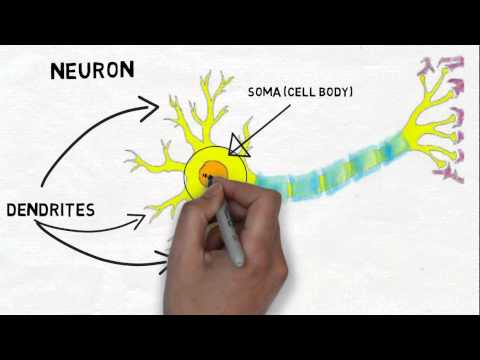

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo("6qS83wD29PY")

![resting potential](https://courses.washington.edu/conj/membpot/cellsionspsp.png) 

![origin of membrane potential](https://images.tutorvista.com/cms/images/81/nernst-equation-membrane-potential.png)

![myocyte concentrations](https://www.cvphysiology.com/Arrhythmias/A007%20membrane%20ions.gif) 

#### [Link for engineering-type people to learn more](https://www.scientifica.uk.com/learning-zone/understanding-the-cell-as-an-electrical-circuit)
#### [Link for gunner premeds to USMLE study materials](https://www.yousmle.com/equilibrium-nernst-potential-for-the-usmle)

## What is an action potential?

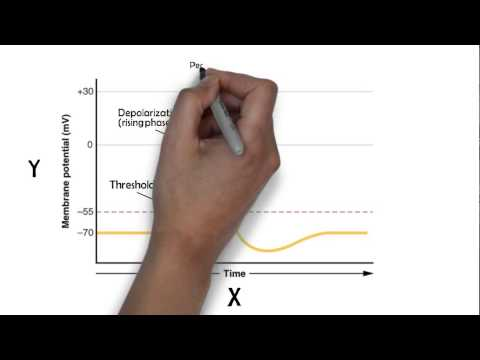

In [4]:
YouTubeVideo("W2hHt_PXe5o")

### [Quick simulation demo of how these variables change over time](https://live.geppetto.org/geppetto?load_project_from_id=1)

## [The Allen Institute and their data](http://portal.brain-map.org)

In [5]:
# Install the Allen Institute API.  An API is programming module for interacting with a particular kind of program or dataset
!pip install allensdk

In [6]:
# Load a file downloader to get data from The Allen Institute
from allensdk.core.cell_types_cache import CellTypesCache 

# Create an instance of that file downloader
ctc = CellTypesCache(manifest_file='cell_types/manifest.json') 

# An example of a dataset id (the last part of the URL in e.g. http://celltypes.brain-map.org/experiment/electrophysiology/643625553)
dataset_id = 643625553 

# Get information and data for that dataset
parameters = ctc.get_ephys_sweeps(dataset_id)
recordings = ctc.get_ephys_data(dataset_id)

### Pick one of the many "sweeps" (short parts of experiments) performed on this cell

In [7]:
my_sweep_number = 37
my_sweep = recordings.get_sweep(my_sweep_number) # I randomly picked sweep 37
my_sweep

{'stimulus': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 'response': array([-0.07300001, -0.07300001, -0.07300001, ..., -0.07371876,
        -0.07371876, -0.0736875 ], dtype=float32),
 'stimulus_unit': 'Amps',
 'index_range': (37500, 400999),
 'sampling_rate': 50000.0}

### Lets get our units right

In [8]:
# Note on units
from quantities import s, ms, V, mV, A, pA
1000*ms == 1*s

True

In [9]:
# What is the time interval between samples (measurements) in each of these sweeps?
dt = s/my_sweep['sampling_rate']

# How many samples in each of these sweeps?  
n_samples = len(my_sweep['stimulus'])

# Determine the time (relative to the start of the sweep) for each of these samples.  
times = range(n_samples) * dt

### Put it in a dataframe for further use

In [10]:
# Create an empty dataframe to hold the data
df = pd.DataFrame(index=times, columns=['stimulus', 'response'])
df.head()

,stimulus,response
0.00000,NaN,NaN
0.00002,NaN,NaN
0.00004,NaN,NaN
0.00006,NaN,NaN
0.00008,NaN,NaN


In [11]:
# Fill the dataframe with the data from our chosen sweep.  Get the units right
df['stimulus'] = (my_sweep['stimulus'] * A).rescale('pA')
df['response'] = (my_sweep['response'] * V).rescale('mV').round(4)
df.head()

,stimulus,response
0.00000,0.0,-73.0
0.00002,0.0,-73.0
0.00004,0.0,-73.0
0.00006,0.0,-73.0
0.00008,0.0,-73.0


### Let's look at the data

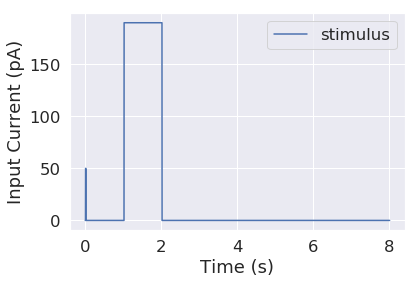

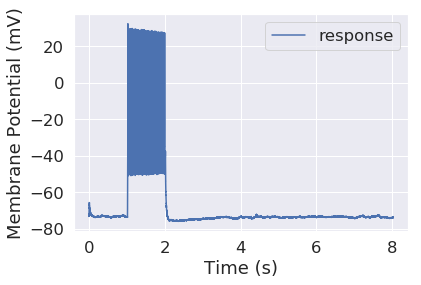

In [12]:
# Plot the time course of the stimulus (the current injected into the cell)
df.plot(y='stimulus')
plt.xlabel('Time (s)')
plt.ylabel('Input Current (pA)');

# Plot the time course of the response 
# (the change in the membrane potential, including action potentials, that results)
df.plot(y='response')
plt.xlabel('Time (s)')
plt.ylabel('Membrane Potential (mV)');

### Make the figure wider and zoom in to the interesting part

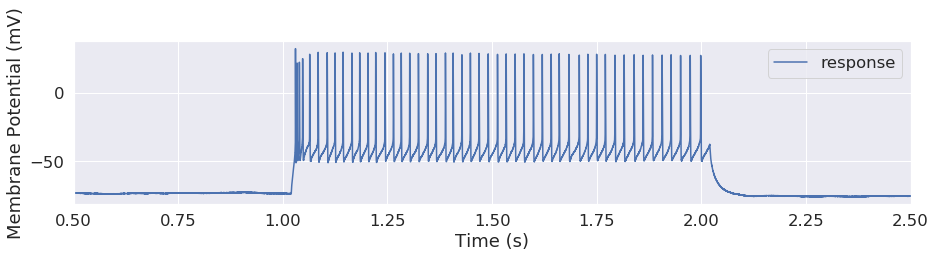

In [13]:
df.plot(y='response', figsize=(15,3))
plt.xlabel('Time (s)')
plt.ylabel('Membrane Potential (mV)');
plt.xlim(0.5,2.5);

### The action potentials are usually the interesting part.  When do they occur?

In [14]:
from scipy.signal import find_peaks
# Find the peak locations and heights, for peaks that go above 0
spike_times, spike_amplitudes = find_peaks(df['response'], height=0)

# Information about the extracted spike times
print("There are %d spikes in this sweep" % len(spike_times))
spike_times * dt

There are 49 spikes in this sweep


array([1.03026, 1.03426, 1.03956, 1.04736, 1.06424, 1.08444, 1.10614,
       1.12488, 1.144  , 1.16518, 1.1837 , 1.20368, 1.22192, 1.24414,
       1.26428, 1.28304, 1.30318, 1.32404, 1.34618, 1.366  , 1.3886 ,
       1.40694, 1.428  , 1.4482 , 1.46882, 1.49074, 1.51298, 1.5337 ,
       1.55516, 1.57616, 1.59872, 1.61998, 1.6413 , 1.6605 , 1.68358,
       1.7084 , 1.72884, 1.74988, 1.77064, 1.79374, 1.81562, 1.8394 ,
       1.86094, 1.88338, 1.90632, 1.92776, 1.95044, 1.9735 , 1.9985 ]) * s

### What is the purpose of this sweep?  Are there others like it?

In [15]:
parameters[my_sweep_number]

{'bridge_balance_mohm': 10.7448110580444,
 'id': 643632225,
 'leak_pa': -6.432936668396,
 'num_spikes': 30,
 'peak_deflection': None,
 'post_noise_rms_mv': 0.0318580716848373,
 'post_vm_mv': -73.4478149414062,
 'pre_noise_rms_mv': 0.0392096601426601,
 'pre_vm_mv': -73.2483520507812,
 'slow_noise_rms_mv': 0.220357805490494,
 'slow_vm_mv': -73.2483520507812,
 'specimen_id': 643625553,
 'stimulus_absolute_amplitude': 129.99999687846,
 'stimulus_description': 'C1LSFINEST150112[0]',
 'stimulus_duration': 0.99998,
 'stimulus_interval': None,
 'stimulus_name': 'Long Square',
 'stimulus_relative_amplitude': 10.0,
 'stimulus_start_time': 1.02,
 'stimulus_units': 'pA',
 'sweep_number': 45,
 'vm_delta_mv': 0.199462890625}

In [16]:
my_sweep_type = parameters[my_sweep_number]['stimulus_name']

### Find the others like it

In [17]:
n_sweeps = len(parameters)
my_sweep_type_indices = []
for i in range(n_sweeps):
    if parameters[i]['stimulus_name'] == my_sweep_type:
        my_sweep_type_indices.append(i)
    
my_sweep_type_indices

[18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38]

### Put all the spikes from all of those sweeps in a big list

In [18]:
all_spike_times = []
for i in my_sweep_type_indices: # Iterate over all the sweep numbers that have 
                                    # the kind of sweep we want
    try: # Try to find that sweep in the list of recordings
        my_sweep = recordings.get_sweep(i) # Get sweep number "i"
    except: # Sometimes it isn't there, and we won't ask questions
        pass
    response = (my_sweep['response'] * V).rescale('mV') # Extract the response from this sweep
    spike_times, spike_amplitudes = find_peaks(response, height=0) # Find the spike times
    all_spike_times += list(spike_times * dt) # Add these spike times (with proper units)
all_spike_times[:25] # First 25 spikes found across the whole dataset

[array(1.03026) * s,
 array(1.03426) * s,
 array(1.03956) * s,
 array(1.04736) * s,
 array(1.06424) * s,
 array(1.08444) * s,
 array(1.10614) * s,
 array(1.12488) * s,
 array(1.144) * s,
 array(1.16518) * s,
 array(1.1837) * s,
 array(1.20368) * s,
 array(1.22192) * s,
 array(1.24414) * s,
 array(1.26428) * s,
 array(1.28304) * s,
 array(1.30318) * s,
 array(1.32404) * s,
 array(1.34618) * s,
 array(1.366) * s,
 array(1.3886) * s,
 array(1.40694) * s,
 array(1.428) * s,
 array(1.4482) * s,
 array(1.46882) * s]

### Make a peri-stimulus spike time histogram (STH) to characterize the response of the cell to that kind of stimulus

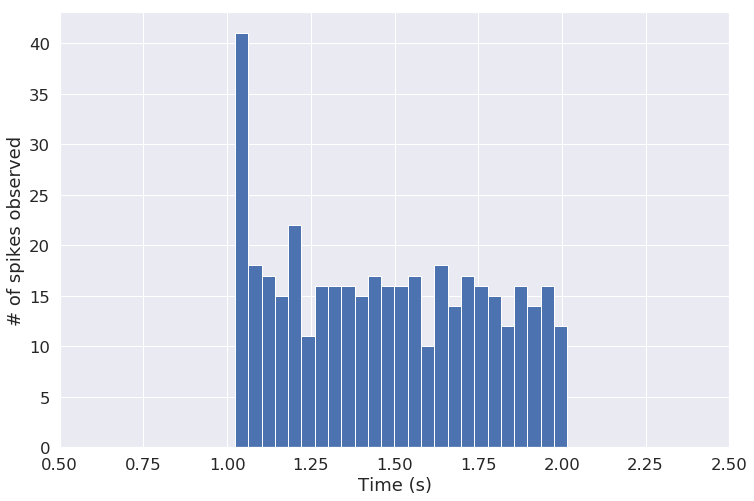

In [19]:
plt.figure(figsize=(12,8))
plt.hist(all_spike_times, bins=25);
plt.xlabel('Time (s)')
plt.ylabel('# of spikes observed')
plt.xlim(0.5,2.5);

### This behavior is one of many types

![izhikevich zoo](https://www.izhikevich.org/publications/figure1.gif)

### Simulation of the same phenomenon (for math people, or people who prefer fake things to real things)
#### Optional, skip if this is not you

In [20]:
# Install the Brian2 simulator (because Brian1 just won't cut it)
!pip install brian2

In [21]:
# Importing functions and units from the Brian2 library
from brian2 import Equations, start_scope, run, NeuronGroup, Synapses, StateMonitor, SpikeMonitor
from brian2 import ms, second # units of time
from brian2 import ufarad # units of capacitance
from brian2 import siemens, msiemens, nS # units of conductance
from brian2 import mV # units of voltage 
from brian2 import umetre, cm # units of length

In [22]:
start_scope() # Start a new simulation

# Parameters to describe the size and electrical properties of the cell
area = 20000*umetre**2
Cm = (1*ufarad*cm**-2) * area
gl = (5e-5*siemens*cm**-2) * area
El = -60*mV
EK = -90*mV
ENa = 50*mV
g_na = (100*msiemens*cm**-2) * area
g_kd = (30*msiemens*cm**-2) * area
VT = -63*mV

# Time constants to describe how synaptic currents decay
taue = 5*ms
taui = 10*ms

# Reversal potentials (the electromotive driving force for each type of ion, basically)
Ee = 0*mV
Ei = -80*mV
we = 6*nS  # excitatory synaptic weight
wi = 67*nS  # inhibitory synaptic weight

# The model (as a set of ODEs)
eqs = Equations('''
dv/dt = (gl*(El-v)+ge*(Ee-v)+gi*(Ei-v)-
         g_na*(m*m*m)*h*(v-ENa)-
         g_kd*(n*n*n*n)*(v-EK))/Cm : volt
dm/dt = alpha_m*(1-m)-beta_m*m : 1
dn/dt = alpha_n*(1-n)-beta_n*n : 1
dh/dt = alpha_h*(1-h)-beta_h*h : 1
dge/dt = -ge*(1./taue) : siemens
dgi/dt = -gi*(1./taui) : siemens
alpha_m = 0.32*(mV**-1)*(13*mV-v+VT)/
         (exp((13*mV-v+VT)/(4*mV))-1.)/ms : Hz
beta_m = 0.28*(mV**-1)*(v-VT-40*mV)/
        (exp((v-VT-40*mV)/(5*mV))-1)/ms : Hz
alpha_h = 0.128*exp((17*mV-v+VT)/(18*mV))/ms : Hz
beta_h = 4./(1+exp((40*mV-v+VT)/(5*mV)))/ms : Hz
alpha_n = 0.032*(mV**-1)*(15*mV-v+VT)/
         (exp((15*mV-v+VT)/(5*mV))-1.)/ms : Hz
beta_n = .5*exp((10*mV-v+VT)/(40*mV))/ms : Hz
''')

# The network, describing how each of these (otherwise identical) neurons is connected to each other
n_neurons = 40
P = NeuronGroup(n_neurons, model=eqs, threshold='v>-20*mV', refractory=3*ms,
                method='exponential_euler')
n_excitatory = int(n_neurons * 0.8)
Pe = P[:n_excitatory]
Pi = P[n_excitatory:]
Ce = Synapses(Pe, P, on_pre='ge+=we')
Ci = Synapses(Pi, P, on_pre='gi+=wi')
Ce.connect(p=0.02)
Ci.connect(p=0.02)

# Initial conditions for some of the state variables, including random numbers
P.v = 'El + (randn() * 5 - 5)*mV'
P.ge = '(randn() * 1.5 + 4) * 10.*nS'
P.gi = '(randn() * 12 + 20) * 10.*nS'

# Run this simulation and record both the membrane potential and the action potential (spike) times of the neurons 
traces = StateMonitor(P, 'v', record=range(n_neurons))
spikes = SpikeMonitor(P)
run(1 * second, report='text')

unable to execute 'gcc': No such file or directory
WARNING    Cannot use Cython, a test compilation failed: command 'gcc' failed with exit status 1 (CompileError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]
INFO       Cannot use compiled code, falling back to the numpy code generation target. Note that this will likely be slower than using compiled code. Set the code generation to numpy manually to avoid this message:
prefs.codegen.target = "numpy" [brian2.devices.device.codegen_fallback]


Starting simulation at t=0. s for a duration of 1. s
1.0 (100%) simulated in 4s


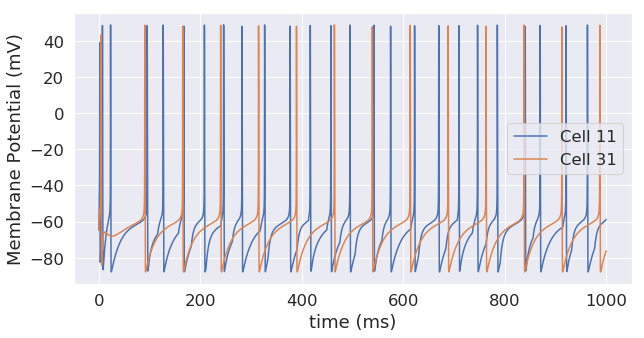

In [23]:
# Plot the output for two randomly chosen neurons
# The results are random in each simulation (see above), so if you don't like the ones here, 
# pick different neuron indices (instead of 11 and 31), or run the simulation again.  
plt.figure(figsize=(10,5))
cell_indices = [11, 31]
for i in cell_indices:
    plt.plot(traces.t/ms, traces[i].v/mV, label="Cell %d" % i)
plt.xlabel('time (ms)')
plt.ylabel('Membrane Potential (mV)');
plt.legend()

In [24]:
# The spike times (if any) for the first of those cells.  
spikes.spike_trains()[cell_indices[0]]/ms

array([  1.3,   6.6,  22.6,  94.9, 126.4, 166.9, 207.6, 245.5, 281.8,
       326.3, 376.6, 416.3, 456.9, 494.5, 541.6, 574.6, 621.9, 669.5,
       709.4, 746. , 785. , 840. , 869.4, 920.5, 962.6])